### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
#%load_ext autoreload
#%autoreload 2
#%reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

In [3]:
!python setup.py build_ext --inplace

running build_ext
copying build/lib.linux-x86_64-3.6/agent_timestep.cpython-36m-x86_64-linux-gnu.so -> 


In [4]:
#Importing scripts:
import cbgt as cbgt
from frontendhelpers import * 
from tracetype import *
import init_params as par 
import popconstruct as popconstruct
import qvalues as qval
import generateepochs as gen
from agentmatrixinit import *
#from general_init_codeblocks import *
from agent_timestep import timestep_mutator, multitimestep_mutator
import pdb
import pipeline_creation as pl_creat
import mega_loop as ml
import plotting_functions as plt_func
import matplotlib.pyplot as plt

/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)
2021-10-01 14:39:20,857	INFO worker.py:727 -- Connecting to existing Ray cluster at address: 10.0.0.154:6379


# Create pipeline

### Network pipeline

In [5]:
seed = np.random.randint(0,9999999)
print(seed)
np.random.seed(seed)
to_check = np.random.randint(0,50,10)
print(to_check)

5158936
[43 33 22 37 13 47  1 12 16 43]


In [6]:
#Create the whole pipeline.
#This pipeline creates three sub-pipelines: 
#rewards pipeline (rsg), q values pipeline (q_val), network pipeline(pl)

pl = pl_creat.create_main_pipeline()
mega_l = ml.mega_loop

# Timestep loop

In [7]:
#Adding the timestep loop to the main pipeline
pl.add(mega_l)

# Running the pipeline

### 1. Default values

In [8]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 3.5, # 3 instead? how much stimulus the LIP gets at maximum
}


In [9]:
results = cbgt.ExecutionManager(cores=7).run([pl],[environment])

(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `p

(pid=None) 10 6 1`
(pid=None) 10 8 1`
(pid=None) 10 12 1`
(pid=None) 10 13 1`
(pid=None) 10 14 1`
(pid=None) 11 7 1`
(pid=None) 11 9 1`
(pid=None) 11 12 1`
(pid=None) 11 13 1`
(pid=None) 11 14 1`
(pid=None) 10 6 1`
(pid=None) 10 8 1`
(pid=None) 10 12 1`
(pid=None) 10 13 1`
(pid=None) 10 14 1`
(pid=None) 11 7 1`
(pid=None) 11 9 1`
(pid=None) 11 12 1`
(pid=None) 11 13 1`
(pid=None) 11 14 1`
(pid=None) 10 6 1`
(pid=None) 10 8 1`
(pid=None) 10 12 1`
(pid=None) 10 13 1`
(pid=None) 11 7 1`
(pid=None) 11 9 1`
(pid=None) 11 12 1`
(pid=None) 11 13 1`
(pid=None) 10 6 1`
(pid=None) 10 8 1`
(pid=None) 10 12 1`
(pid=None) 10 13 1`
(pid=None) 11 7 1`
(pid=None) 11 9 1`
(pid=None) 11 12 1`
(pid=None) 11 13 1`
(pid=None) phasetimer 1
(pid=None) globaltimer 1
(pid=None) gateFRs [100. 100.]
(pid=None) thresholds_crossed [0 1]
(pid=None) phasetimer 1
(pid=None) globaltimer 1
(pid=None) gateFRs [100. 100.]
(pid=None) thresholds_crossed [0 1]
(pid=None) phasetimer 101
(pid=None) globaltimer 102
(pid=None) 

In [10]:
results[0].keys()

dict_keys(['params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'connectivity_AMPA', 'meaneff_AMPA', 'plastic_AMPA', 'connectivity_GABA', 'meaneff_GABA', 'plastic_GABA', 'connectivity_NMDA', 'meaneff_NMDA', 'plastic_NMDA', 'AMPA_con', 'AMPA_eff', 'GABA_con', 'GABA_eff', 'NMDA_con', 'NMDA_eff', 'agent', 'datatables', 'reward_val', 'popfreqs'])

In [11]:
cbgt.saveResults(results,'test',['popfreqs','popdata'])

In [12]:
results[0]['actionchannels']

,action
0,left
1,right


In [13]:
results[0]['popdata']

,name,action,N,C,Taum,RestPot,ResetPot,Threshold,RestPot_ca,Alpha_ca,...,dpmn_APRE,dpmn_APOST,dpmn_XPRE,dpmn_XPOST,dpmn_type,dpmn_alphaw,dpmn_a,dpmn_b,dpmn_c,column
0,GPi`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,0
1,GPi`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,1
2,STNE`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,2
3,STNE`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,3
4,GPeP`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,4
5,GPeP`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,5
6,D1STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,6
7,D1STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,7
8,D2STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,8
9,D2STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,9


In [14]:
results[0]['popfreqs']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Time (ms)
0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,0
1,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1
2,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,2
3,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1011
1012,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1012
1013,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1013
1014,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1014


In [15]:
results[0] = plt_func.rename_columns(results[0])
results[0]['popfreqs']

,GPi_left,GPi_right,STNE_left,STNE_right,GPeP_left,GPeP_right,D1STR_left,D1STR_right,D2STR_left,D2STR_right,Cx_left,Cx_right,Th_left,Th_right,FSI_common,CxI_common,Time (ms)
0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,0
1,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1
2,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,2
3,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1011
1012,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1012
1013,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1013
1014,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0,1014


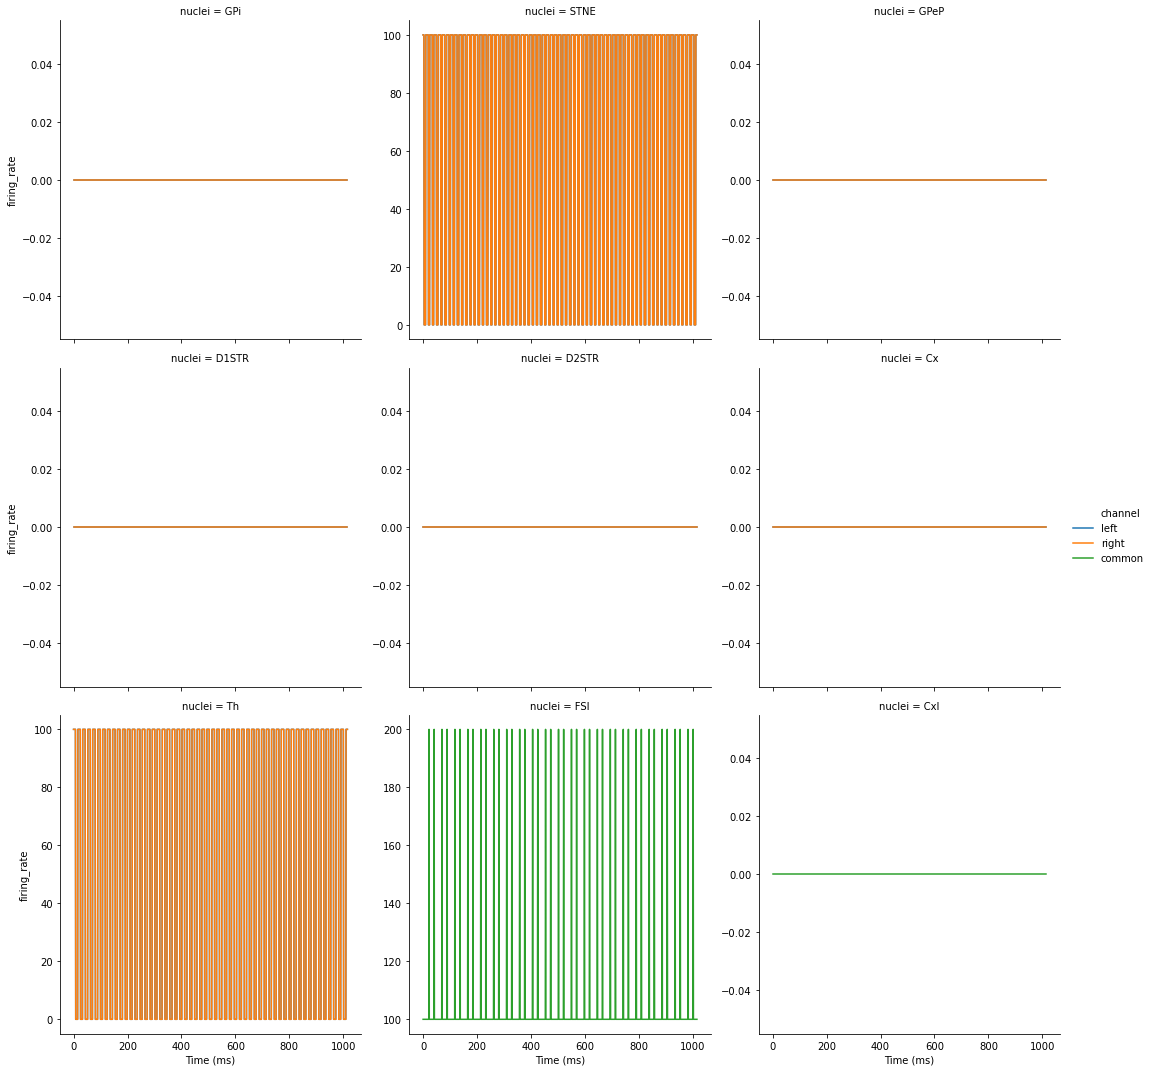

2021-10-02 09:37:01,630	WARNING worker.py:1114 -- The autoscaler failed with the following error:
Traceback (most recent call last):
  File "/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/monitor.py", line 317, in run
    self._run()
  File "/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/monitor.py", line 207, in _run
    self.update_load_metrics()
  File "/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/monitor.py", line 170, in update_load_metrics
    request, timeout=4)
  File "/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/grpc/_channel.py", line 946, in __call__
    return _end_unary_response_blocking(state, call, False, None)
  File "/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/grpc/_channel.py", line 849, in _end_unary_response_blocking
    raise _InactiveRpcError(state)
grpc._channel._InactiveRpcError: <_Inac

In [16]:
plt_func.plot_fr(results[0])

In [ ]:
savedresults = cbgt.loadResults('test')
savedresults[0]['popfreqs']

In [ ]:
t_epochs = cbgt.collateVariable(results,'t_epochs')
t_epochs

In [ ]:
# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

# LLLRLLLRLLLRRLLLLLRRRRRRLLRRRRLLRRRLRRRRLLLLLRLLRLLLLLRLLLLRLLLLLRRRRRRRRRRRRRRRRR

# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

In [ ]:
Q_df = cbgt.collateVariable(results,'Q_df')
Q_df[0]

In [ ]:
datatables = cbgt.collateVariable(results,'datatables')

In [ ]:
datatables[0]

In [ ]:
cbgt.comparisonTable(results, ['n_trials','volatility','conflict'])

In [ ]:
popfreqs = cbgt.collateVariable(results,'popfreqs')

In [ ]:
popdata = cbgt.collateVariable(results,'popdata')

In [ ]:
popdata[0][popdata[0]['name'] == 'LIP']['column']

In [ ]:
plt.plot(popfreqs[0].iloc[:,7])
plt.plot(popfreqs[0].iloc[:,8])
plt.show()

### 2. Modifying default values 

### 2.1 Modifying values 

In [ ]:
environment = {
    'params': pd.DataFrame([[8, 30]], columns=['N', 'C']),
    'pops' : {'FSI': {'Taum': [60]}}, 
    'receps' : pd.DataFrame([[100, 100]], columns=['Tau_AMPA', 'Tau_GABA']), 
    'base' : {'FSI': {'FreqExt_AMPA': [100]}}, 
    'dpmns' : pd.DataFrame([[400, 100]], columns=['dpmn_wmax', 'dpmn_tauDOP']),
    'd1' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'd2' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : pd.DataFrame([['LIP', 'D1STR', 'AMPA', 'syn', 700, 0.027]], columns=['src', 'dest', 'receptor', 'type', 'con', 'eff']), 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 2.2 Modifying a subset of values

In [ ]:
environment = {
    'params': pd.DataFrame([[4, 1]], columns=['N', 'C']), 
    'pops': None,
    'receps' : None, 
    'base' : None,
    'dpmns' : None,
    'd1' : None,
    'd2' : None,
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : None, 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}

results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 3. Back to default values 

In [ ]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

In [ ]:
#?

In [ ]:
dev = cbgt.Pipeline()

In [ ]:
dev.add(codeblock_agent_phase0)

In [ ]:
output = cbgt.ExecutionManager(cores=7).run(dev,results) 